# Лабораторная работа № 2. 
Деревья решений ­-- Классификатор
пола по голосу

--------------------
Выполнил:\
**Маковеев Никита Владимирович**

-------------------------

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split

target_variable = 'label' 
random_state = 97

In [5]:
voice_data = pd.read_csv('voice_gender.csv')
voice_data.head()


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
voice_data.isnull().sum().sum()

0

In [7]:
y = voice_data[target_variable]
X = voice_data.drop(target_variable, axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=random_state)
print('Train shape: X - {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))


Train shape: X - (2534, 20)
Test shape: (634, 20)


### Задание 1.

In [9]:

dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [10]:
dt.fit(X_train, y_train)
dt.classes_

array(['female', 'male'], dtype=object)

[Text(0.5, 0.75, 'meanfun <= 0.14\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]\nclass = female'),
 Text(0.25, 0.25, 'entropy = 0.261\nsamples = 1271\nvalue = [56, 1215]\nclass = male'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'entropy = 0.248\nsamples = 1263\nvalue = [1211, 52]\nclass = female'),
 Text(0.625, 0.5, '  False')]

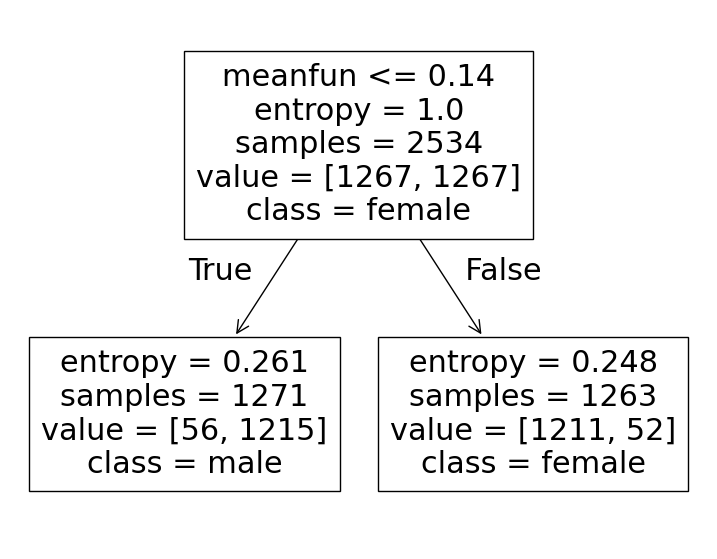

In [11]:
fig= plt.figure(figsize=(9,7))
tree.plot_tree(dt, feature_names=X.columns, class_names = dt.classes_)

In [12]:
pred = dt.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.9384858044164038

1. На основе какого фактора будет построено решающее правило в корневой вершине?\
**Ответ** meanfun (средняя основная частота в акустическом спектре)
2. Чему равно оптимальное пороговое значение для данного фактора? Ответ округлите до трёх\
знаков после точки­ разделителя.
**Ответ** 0.14
3. Сколько процентов наблюдений, для которых выполняется заданное в корневой вершине
условие, содержится в обучающей выборке? Ответ округлите до одного знака после точкиразделителя. Не указывайте в ответе символ %.\
**Ответ** 50.1
1. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ
округлите до трёх знаков после точки­разделителя.\
**Ответ** 0.939

### Задание 2. 

In [14]:
tree_2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [15]:
tree_2.fit(X_train, y_train)
tree_2.classes_

array(['female', 'male'], dtype=object)

[Text(0.5, 0.8333333333333334, 'meanfun <= 0.14\nentropy = 1.0\nsamples = 2534\nvalue = [1267, 1267]\nclass = female'),
 Text(0.25, 0.5, 'IQR <= 0.074\nentropy = 0.261\nsamples = 1271\nvalue = [56, 1215]\nclass = male'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'entropy = 0.999\nsamples = 69\nvalue = [36, 33]\nclass = female'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.122\nsamples = 1202\nvalue = [20, 1182]\nclass = male'),
 Text(0.75, 0.5, 'meanfun <= 0.148\nentropy = 0.248\nsamples = 1263\nvalue = [1211, 52]\nclass = female'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.927\nsamples = 114\nvalue = [75, 39]\nclass = female'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.089\nsamples = 1149\nvalue = [1136, 13]\nclass = female')]

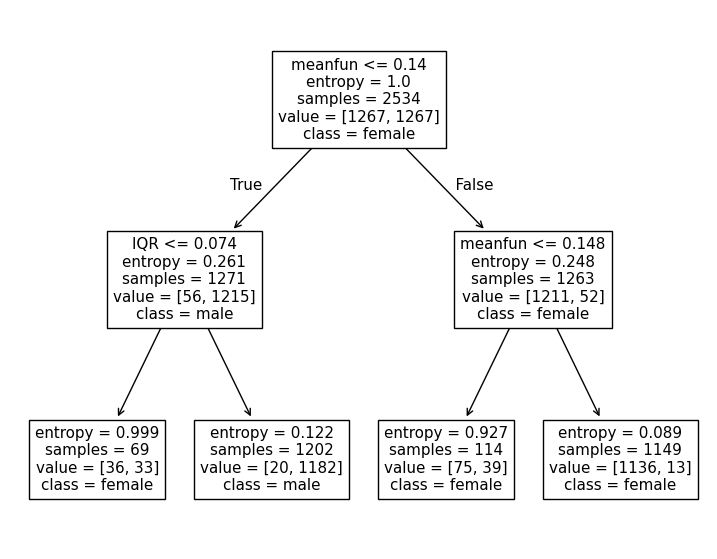

In [16]:
fig= plt.figure(figsize=(9,7))
tree.plot_tree(tree_2, feature_names=X.columns, class_names = tree_2.classes_)

In [17]:
pred = tree_2.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.9463722397476341

1. Из приведённых ниже факторов выберите те, что используются при построении данного
дерева решений:\
**Ответ** meanfun, IQR.
1. . Сколько листьев в построенном дереве содержат в качестве предсказания класс female?
**Ответ** 3
1. Сделайте предсказание и рассчитайте значение метрики accuracy на тестовой выборке. Ответ
округлите до трёх знаков после точки­разделителя.\
**Ответ** 0.946

### Задание 3. 

In [19]:
max_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=random_state)

In [20]:
max_tree.fit(X_train, y_train)
print(*max_tree.classes_)
max_tree.get_depth(), max_tree.get_n_leaves()

female male


(9, 54)

In [21]:
pred_test = max_tree.predict(X_test)
pred_train = max_tree.predict(X_train)

In [22]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, pred_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test, accuracy_train

(0.9668769716088328, 1.0)

1. Чему равна глубина полученного дерева решения? 
   **Ответ** 9
1. Чему равно количество листьев в полученном дереве решений? 
   **Ответ** 54
1. Сделайте предсказание для обучающей и тестовой выборок и рассчитайте значение метрики
accuracy на каждой из выборок (отдельно на обучающей и тестовой).
   **Ответ** 0.966 1

### Задание 4. 

In [23]:
model = tree.DecisionTreeClassifier(random_state=random_state)
param_grid = {
'criterion': ['gini', 'entropy'], #критерий информативности
'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов,
}
cv = model_selection.StratifiedKFold(n_splits=5)
grid_search = model_selection.GridSearchCV(model, param_grid,scoring="accuracy", cv=cv )
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(random_state=97),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [3, 4, 5, 10]},
             scoring='accuracy')

In [24]:
final_model = grid_search.best_estimator_
final_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 97,
 'splitter': 'best'}

In [25]:
pred_test = final_model.predict(X_test)
pred_train = final_model.predict(X_train)

In [26]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, pred_test)
accuracy_train = accuracy_score(y_train, pred_train)
accuracy_test, accuracy_train

(0.9605678233438486, 0.988950276243094)

1. Какой критерий информативности использует наилучшая модель?\
**Ответ**: Критерий Джини
1. Чему равна оптимальная найденная автоматически максимальная глубина?\
**Ответ**: 6
1. Чему равно оптимальное минимальное количество объектов, необходимое для разбиения?\
**Ответ**: 10
1. С помощью наилучшей модели сделайте предсказание отдельно для обучающей и тестовой
выборок\
**Ответ**: 0.961, 0.989 


### Задание 5.


In [56]:
features = final_model.feature_importances_
name_features = final_model.feature_names_in_
l = list(zip(name_features, features))
l.sort(key=lambda x: x[1], reverse=True)
l

[('meanfun', 0.8971200033090486),
 ('IQR', 0.049419031222192385),
 ('minfun', 0.01633296110261472),
 ('sd', 0.011117235302050936),
 ('sfm', 0.007442443809151319),
 ('Q75', 0.004552597918583547),
 ('Q25', 0.004021872207865159),
 ('median', 0.003525342368672914),
 ('dfrange', 0.0024556885936761487),
 ('centroid', 0.0019591759067468066),
 ('maxdom', 0.001562710923248459),
 ('sp.ent', 0.0004909373361490057),
 ('meanfreq', 0.0),
 ('skew', 0.0),
 ('kurt', 0.0),
 ('mode', 0.0),
 ('maxfun', 0.0),
 ('meandom', 0.0),
 ('mindom', 0.0),
 ('modindx', 0.0)]

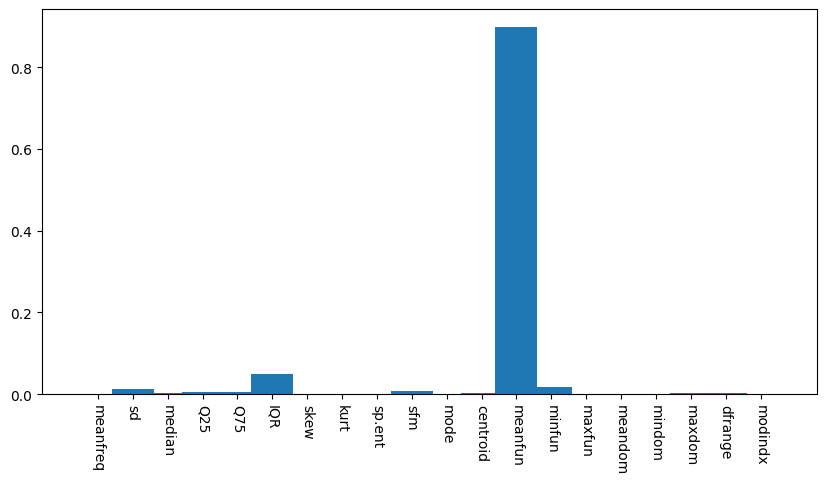

In [53]:
fig, ax = plt.subplots(figsize = (10,5))
ax.bar(name_features, features, width=1.2)
plt.xticks(rotation=270)
plt.show()


**Топ 3:**
+ meanfun
+ IQR
+ minfun